# Diffusion Training Loss
Load the diffusion training loss log stored under `model/diffusion/training_loss.json` and plot the epoch-wise loss curve.

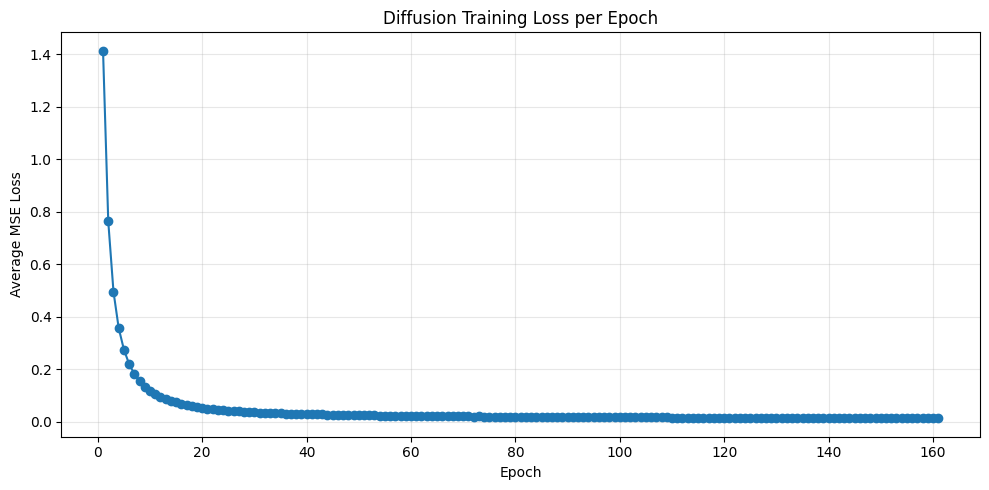

In [2]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

loss_path = Path('../model/diffusion/training_loss.json')
if not loss_path.exists():
    raise FileNotFoundError(f'Cannot find loss log at {loss_path}. Run diffusion training first.')

with open(loss_path, 'r') as f:
    raw_history = json.load(f)

records = sorted((entry['epoch'], entry['loss']) for entry in raw_history.values())
if not records:
    raise ValueError('Loss history is empty. Check your training run.')

epochs, losses = zip(*records)

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, marker='o')
plt.title('Diffusion Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average MSE Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Demucs Training Loss
Load the Demucs waveform model training loss log stored under `model/demucs/loss_log.json` and plot the epoch-wise loss curve.

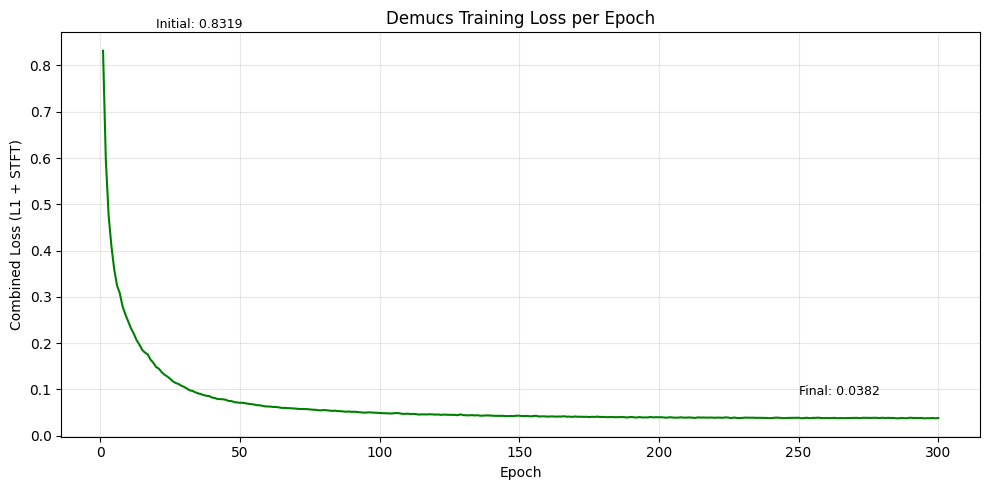

Training Summary:
  Epochs: 300
  Initial loss: 0.8319
  Final loss: 0.0382
  Min loss: 0.0375 at epoch 295
  Loss reduction: 95.4%


In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

demucs_loss_path = Path('../model/demucs/loss_log.json')
if not demucs_loss_path.exists():
    raise FileNotFoundError(f'Cannot find loss log at {demucs_loss_path}. Run Demucs training first.')

with open(demucs_loss_path, 'r') as f:
    demucs_history = json.load(f)

# Extract epochs and losses
demucs_epochs = [entry['epoch'] for entry in demucs_history]
demucs_losses = [entry['loss'] for entry in demucs_history]

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(demucs_epochs, demucs_losses, marker='', linewidth=1.5, color='green')
plt.title('Demucs Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Combined Loss (L1 + STFT)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add annotations
plt.annotate(f'Initial: {demucs_losses[0]:.4f}', xy=(demucs_epochs[0], demucs_losses[0]), 
             xytext=(20, demucs_losses[0] + 0.05), fontsize=9)
plt.annotate(f'Final: {demucs_losses[-1]:.4f}', xy=(demucs_epochs[-1], demucs_losses[-1]), 
             xytext=(demucs_epochs[-1] - 50, demucs_losses[-1] + 0.05), fontsize=9)

plt.show()

print(f"Training Summary:")
print(f"  Epochs: {len(demucs_losses)}")
print(f"  Initial loss: {demucs_losses[0]:.4f}")
print(f"  Final loss: {demucs_losses[-1]:.4f}")
print(f"  Min loss: {min(demucs_losses):.4f} at epoch {demucs_epochs[demucs_losses.index(min(demucs_losses))]}")
print(f"  Loss reduction: {((demucs_losses[0] - demucs_losses[-1]) / demucs_losses[0] * 100):.1f}%")